In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, accuracy_score

# 1 Многослойный перцептрон для задачи регрессии

Пример простой задачи с одной переменной

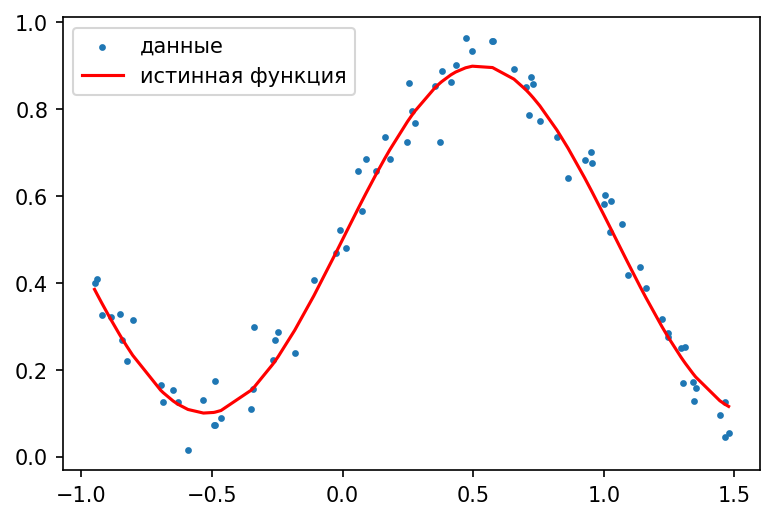

In [ ]:
# размер выборки
sample_volume = 80
# обучающая выборка
x = np.random.uniform(-1, 1.5, (sample_volume,1))
y_true = np.sin(3*x)/2.5 + 0.5
y = y_true + np.random.normal(0, 0.05, (sample_volume,1))

fig, ax = plt.subplots(dpi=150)
ax.scatter(x, y, s=5, label = 'данные')
ax.plot(np.sort(x, axis=0), y_true[np.argsort(x, axis=0).flatten()], color='red', label = 'истинная функция')
ax.legend()
plt.show()

Параметры нейронной сети:

* $n$ - размерность задачи (число независимых переменных, входы)

* $L$ - массив числа нейронов на скрытых слоях (пример, 2 скрытых слоя с 3 и 2 нейронами - $L=[3,2]$)

In [ ]:
n = 1
L = [3, 2]

Для вычислений необходимо знать полную структуру, сколько элементов на каждом слое: входной, скрытые, выходной

In [ ]:
nn_structure = np.array([n])
nn_structure = np.hstack([nn_structure, L])
nn_structure = np.hstack([nn_structure, 1])
num_layers = nn_structure.shape[0]
print("Число всех слоев:", num_layers)
print("Число элементов на всех слоях:",nn_structure)

Число всех слоев: 4
Число элементов на всех слоях: [1 3 2 1]


Функция вычисления сигмоиды в скрытых слоях

In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

Случайная инициализация весов небольшими значениями равномерно в интервале $[-1, 1]$.

Существуют методы инициализации с учетом размеров слоев и типа функции активации.

In [ ]:
weights = []
for i in range(num_layers-1):
  weights.append( np.random.uniform(-1,1,
                (nn_structure[i]+1, nn_structure[i+1])) )
  if i != (num_layers-2):
    print("Матрица весов слоя",(i+1),weights[i].shape)
  else:
    print("Матрица весов выходного слоя",weights[i].shape)
print("\nЗначения весов:")
weights

Матрица весов слоя 1 (2, 3)
Матрица весов слоя 2 (4, 2)
Матрица весов выходного слоя (3, 1)

Значения весов:


[array([[-0.47409253, -0.23943706,  0.71742605],
        [-0.0264251 , -0.63038547,  0.65209929]]),
 array([[ 0.02790175, -0.38918365],
        [ 0.49916321,  0.22178958],
        [-0.44260072, -0.2416151 ],
        [-0.66170522, -0.10252328]]),
 array([[-0.91174489],
        [-0.85373811],
        [-0.82834981]])]

## 1.1 Прямой проход

### Прямой проход "на пальцах"

На каждом слое надо добавить фиктивный вход с постоянным значением (обычно равно $1$), веса этого входа - это веса смещения.

In [ ]:
inputs = []
inputs.append( np.hstack([x, np.ones((sample_volume,1))]) )
print("Первые 3 примера входных данных 1го слоя (от входа на 1й слоя)")
print(inputs[0][0:3])

Первые 3 примера входных данных 1го слоя (от входа на 1й слоя)
[[ 1.42262655e-05  1.00000000e+00]
 [-5.37458677e-01  1.00000000e+00]
 [-7.22012683e-01  1.00000000e+00]]


Умножим входы на веса, получим для каждого примера суммы для 3х нейронов скрытого слоя 1.

In [ ]:
sum = []
sum.append( np.dot(inputs[0], weights[0]) )
print(sum[0][0:3])

[[ 0.97006062 -0.83875013  0.64461288]
 [ 1.15350002 -1.33319455  0.48862855]
 [ 1.21648827 -1.50297371  0.43506765]]


Выходы нейронов 1го слоя как результат вычисления функций активации (в данном примере сигмоидов) для каждого примера.

In [ ]:
outputs = []
outputs.append( sigmoid(sum[0]) )
print(outputs[0][0:3])

[[0.72513158 0.30179809 0.65579546]
 [0.76014963 0.20863144 0.6197833 ]
 [0.77144496 0.18198242 0.60708312]]


Зная выходы нейронов, можно сказу же вычислить и производные. Для сигмоида это:
$o^{\prime} (x) = o \cdot (1-o)$

In [ ]:
 drvs = []
 drvs.append( outputs[0]*(1-outputs[0]) )

Аналогично делаем вычисления для 2го слоя, входами будут предыдущие выходы с добавленеим фиктивного входа для весов смещения.

In [ ]:
inputs.append( np.hstack([outputs[0], np.ones((sample_volume,1))]) )
sum.append( np.dot(inputs[1], weights[1]) )
outputs.append( sigmoid(sum[1]) )
drvs.append( outputs[1]*(1-outputs[1]) )
print(outputs[1][0:3])

[[0.36241316 0.38201611]
 [0.37439392 0.37299239]
 [0.3781169  0.37020941]]


И также для выходного слоя

In [ ]:
inputs.append( np.hstack([outputs[1], np.ones((sample_volume,1))]) )
sum.append( np.dot(inputs[2], weights[2]) )
outputs.append( sigmoid(sum[2]) )
drvs.append( outputs[2]*(1-outputs[2]) )
print(outputs[2][0:3])

[[0.34621776]
 [0.34759038]
 [0.34801406]]


Зная значения на выходном слое (прогноз сети, ответы), можно сранить их с истинными значениям в выборке и рассчитать ошибку.

*Примечаение: мы не делали кросс-валидацию. При решении реальных задач, делать обязательно.*

In [ ]:
print("MSE =", mean_squared_error(y, outputs[2]))

MSE = 0.10118114693187999


### Прямой проход целиком

Зная структуру НС, проход можно сделать в цикле.

In [ ]:
inputs = []
outputs = []
drvs = []
sum = []
for i in range(num_layers-1):
  if(i == 0):
    inputs.append( np.hstack([x, np.ones((sample_volume,1))]) )
  else:
    inputs.append( np.hstack([outputs[i-1], np.ones((sample_volume,1))]) )
  sum.append( np.dot(inputs[i], weights[i]) )
  outputs.append( sigmoid(sum[i]) )
  drvs.append( outputs[i]*(1-outputs[i]) )

print("MSE =", mean_squared_error(y, outputs[num_layers-2]))

MSE = 0.10118114693187999


## 1.2 Обратное распространение ошибки

### Обратный проход "на пальцах"

Изменения весов выходного слоя включают ошибку (разницу между ответом и истинным значением) умноженные на производную этого слоя.

In [ ]:
delta3 = (outputs[2] - y) * drvs[2]
delta3[0:3]

array([[-0.05115128],
       [ 0.07580551],
       [ 0.03935638]])

Дельты следующих слоев получаются путем умнажения предыдущих дельт на веса слоя. Результат умножить на производную слоя, для которого считается дельта, исключив дельты на входах с постоянным значением равным $1$.

In [ ]:
delta2 = np.dot(delta3, weights[2].T)[:,0:2] * drvs[1]
delta2[0:3]

array([[ 0.00030801,  0.00852547],
       [-0.0004627 , -0.01251631],
       [-0.00024117, -0.00647831]])

In [ ]:
delta1 = np.dot(delta2, weights[1].T)[:,0:3]*drvs[0]
delta1[0:3]

array([[-0.00023151,  0.00040463,  0.00057634],
       [ 0.00031247, -0.00046457, -0.00088108],
       [ 0.00015665, -0.00021668, -0.00046125]])

Для изменения весов из старого значения веса вычитается (минус - направление обратное градиенту) произведение дельты на входы данного слоя и на параметр скорости обучения.

*Примечаение: есть более эффктивные методы использования градиента.*

In [ ]:
learning_rate = 0.5

In [ ]:
print("Старые веса:\n", weights[2])
weights[2] = weights[2] - learning_rate * np.dot(inputs[2].T, delta3)
print("Новые веса:\n", weights[2])

Старые веса:
 [[ 0.44534944]
 [-0.15663942]
 [ 1.02333244]]
Новые веса:
 [[0.91675866]
 [0.39271809]
 [2.40322468]]


In [ ]:
print("Старые веса:\n", weights[1])
weights[1] = weights[1] - learning_rate * np.dot(inputs[1].T, delta2)
print("Новые веса:\n", weights[1])

Старые веса:
 [[-0.82063768 -0.10659133]
 [-0.50927172  0.2436376 ]
 [-0.91033704  0.33237425]
 [ 0.78085682 -0.69520577]]
Новые веса:
 [[-0.82601298 -0.26191149]
 [-0.51316389  0.131992  ]
 [-0.91609415  0.16649614]
 [ 0.77276255 -0.92874153]]


In [ ]:
print("Старые веса:\n", weights[0])
weights[0] = weights[0] - learning_rate * np.dot(inputs[0].T, delta1)
print("Новые веса:\n", weights[0])

Старые веса:
 [[-0.34129981  0.91994297  0.29021804]
 [ 0.97006548 -0.83876322  0.64460875]]
Новые веса:
 [[-0.33555404  0.90947247  0.27740217]
 [ 0.97713748 -0.8525139   0.63005641]]


### Обратный проход целиком

In [ ]:
learning_rate = 0.5

delta = []
for i in reversed(range(num_layers-1)):
  if i == (num_layers-2):
    delta.append( (y - outputs[i]) * drvs[i] )
  else:
    delta.append( np.dot(delta[num_layers-3-i],
                         weights[i+1].T)[:,0:nn_structure[i+1]] * drvs[i] )

for i in range(num_layers-1):
  weights[i] = weights[i] - learning_rate * np.dot(inputs[i].T, delta[num_layers-i-2])

## 1.3 Полный код НС

In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [ ]:
n = 1
L = [5, 3]

nn_structure = np.array([n])
nn_structure = np.hstack([nn_structure, L])
nn_structure = np.hstack([nn_structure, 1])
nn_structure

array([1, 5, 3, 1])

In [ ]:
def rand_weights(nn_structure):
  num_layers = nn_structure.shape[0]
  weights = []
  for i in range(num_layers-1):
    weights.append( np.random.uniform(-1,1,
                  (nn_structure[i]+1, nn_structure[i+1])) )
  return weights

In [ ]:
def forward(x, weights, nn_structure):
  inputs = []
  outputs = []
  drvs = []
  sum = []

  num_layers = nn_structure.shape[0]

  for i in range(num_layers-1):
    if(i == 0):
      inputs.append( np.hstack([x, np.ones((sample_volume,1))]) )
    else:
      inputs.append( np.hstack([outputs[i-1], np.ones((sample_volume,1))]) )
    sum.append( np.dot(inputs[i], weights[i]) )
    outputs.append( sigmoid(sum[i]) )
    drvs.append( outputs[i]*(1-outputs[i]) )

  return inputs, outputs, drvs

In [ ]:
def backward(targets, weights, nn_structure, inputs, outputs, drvs, learning_rate):
  delta = []

  num_layers = nn_structure.shape[0]

  for i in reversed(range(num_layers-1)):
    if i == (num_layers-2):
      delta.append( (outputs[i] - targets) * drvs[i] )
    else:
      delta.append( np.dot(delta[num_layers-3-i],
                          weights[i+1].T)[:,0:nn_structure[i+1]] * drvs[i] )

  for i in range(num_layers-1):
    weights[i] = weights[i] - learning_rate * np.dot(inputs[i].T, delta[num_layers-i-2])/80

  return weights

In [ ]:
weights_ = rand_weights(nn_structure)
inputs_, outputs_, drvs_ = forward(x, weights_, nn_structure)
error = []

learning_rate = 0.5

for i in range(50000):
  weights_ = backward(y, weights_, nn_structure, inputs_, outputs_, drvs_, learning_rate)
  inputs_, outputs_, drvs_ = forward(x, weights_, nn_structure)
  error.append(mean_squared_error(y, outputs_[num_layers-2]))
  if (i+1)%1000 == 0:
    print("epoch =", i+1, " MSE =", mean_squared_error(y, outputs_[num_layers-2]) )

epoch = 1000  MSE = 0.08230203025003928
epoch = 2000  MSE = 0.0820130264837107
epoch = 3000  MSE = 0.0815149009193909
epoch = 4000  MSE = 0.08011295276172994
epoch = 5000  MSE = 0.07469417689981014
epoch = 6000  MSE = 0.0633281535998456
epoch = 7000  MSE = 0.04900686746295603
epoch = 8000  MSE = 0.023655796958917813
epoch = 9000  MSE = 0.009540004247052038
epoch = 10000  MSE = 0.005842366154038472
epoch = 11000  MSE = 0.004894688814250913
epoch = 12000  MSE = 0.004559589632083654
epoch = 13000  MSE = 0.004372112055694537
epoch = 14000  MSE = 0.0042298806790597625
epoch = 15000  MSE = 0.004108698749862162
epoch = 16000  MSE = 0.004001531231282159
epoch = 17000  MSE = 0.0039054572383227836
epoch = 18000  MSE = 0.0038188311507909604
epoch = 19000  MSE = 0.0037404967459298026
epoch = 20000  MSE = 0.0036694907347464534
epoch = 21000  MSE = 0.003604933416638047
epoch = 22000  MSE = 0.0035460057210458416
epoch = 23000  MSE = 0.003491958979665006
epoch = 24000  MSE = 0.003442129516899107
epoch

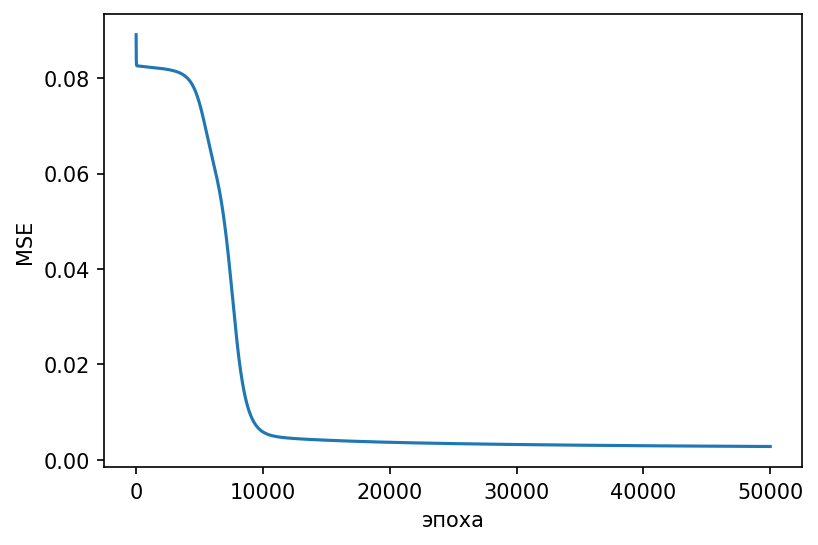

In [ ]:
fig, ax = plt.subplots(dpi=150)
ax.plot(error)
ax.set_xlabel('эпоха')
ax.set_ylabel('MSE')
plt.show()

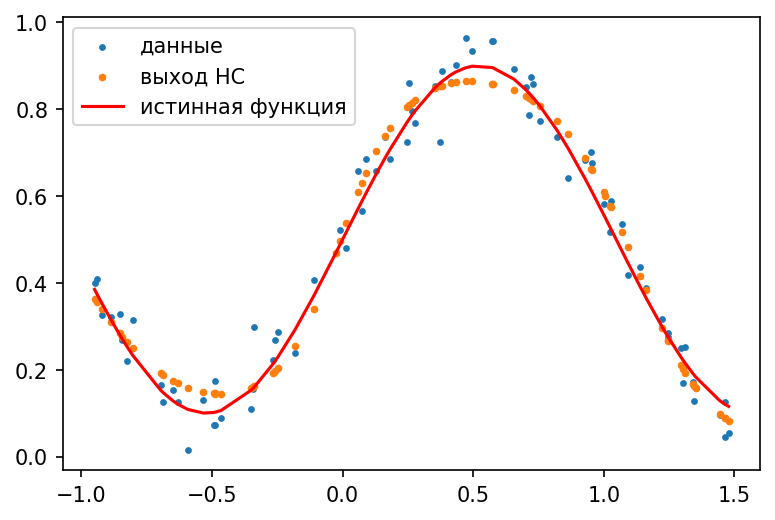

In [ ]:
fig, ax = plt.subplots(dpi=150)
ax.scatter(x, y, s=5, label = 'данные')
plt.scatter(x, outputs_[num_layers-2], s=7, label = 'выход НС')
ax.plot(np.sort(x, axis=0), y_true[np.argsort(x, axis=0).flatten()], color='red', label = 'истинная функция')
ax.legend()
plt.show()
plt.show()

# 2 Многослойный перцептрон для задачи классификации

Пример простой задачи с 2мя классами и 2мя переменными.

Метки классов используют One-Hot-Encoding. Если нет, нужно будет перевести в OHE.

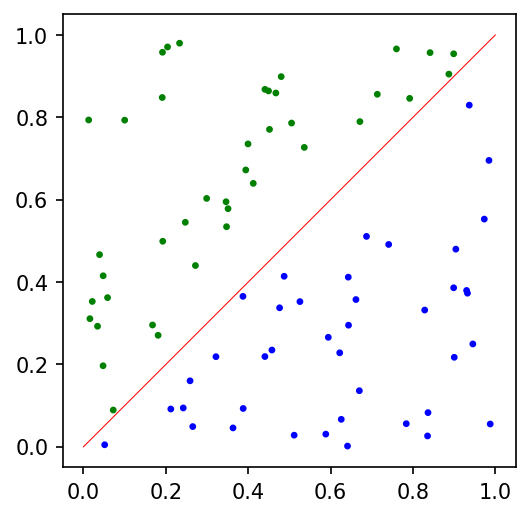

In [ ]:
sample_volume_2 = 80
x1 = np.random.uniform( 0, 1, (sample_volume_2,1) )
x2 = np.random.uniform( 0, 1, (sample_volume_2,1) )
y1 = np.zeros( (sample_volume_2,1) )
y2 = np.zeros( (sample_volume_2,1) )
y1 = np.where( x1>x2, 0, 1) # класс 1
y2 = np.where( x1>x2, 1, 0) # класс 0

fig, ax = plt.subplots(dpi=150)
ax.set_aspect('equal')
ax.scatter(x1, x2, s=5, c=np.where(y1, 'green', 'blue').flatten())
ax.plot([0,1], [0,1], lw=0.5, color='red')
plt.show()

In [ ]:
data = pd.DataFrame( {'x1': x1.flatten(), 'x2':x2.flatten(),
                      'y1':y1.flatten(), 'y2':y2.flatten(),
                      'class': y2.flatten()} )
data.head()

,x1,x2,y1,y2,class
0,0.265464,0.049173,0,1,1
1,0.828716,0.332123,0,1,1
2,0.051607,0.005006,0,1,1
3,0.588539,0.030878,0,1,1
4,0.449510,0.864169,1,0,0


Параметры нейронной сети:

* $n$ - размерность задачи (число независимых переменных, входы)

* $L$ - массив числа нейронов на скрытых слоях (пример, 2 скрытых слоя с 3 и 2 нейронами - $L=[3,2]$)

* $O$ - число выходных нейронов типа $softmax$ равное числу классов

In [ ]:
n = 2
L = [5, 4]
O = 2

In [ ]:
nn_structure = np.array([n])
nn_structure = np.hstack([nn_structure, L])
nn_structure = np.hstack([nn_structure, O])
num_layers = nn_structure.shape[0]
print("Число всех слоев:", num_layers)
print("Число элементов на всех слоях:",nn_structure)

Число всех слоев: 4
Число элементов на всех слоях: [2 5 4 2]


Функция вычисления сигмоиды в скрытых слоях

In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

Функция вычисления выходного слоя $softmax$

In [ ]:
# Совет. Выполните эту функцию в ручном реждиме для какого-либо
# массива, чтобы убедиться, что на работает корректно.
def softmax(x):
  # for stability, we shift values down so max = 0
  exp_shifted = np.exp(x - x.max(axis=1).reshape(-1,1))
  return exp_shifted / np.sum(exp_shifted, axis=1).reshape(-1,1)

Случайная инициализация весов небольшими значениями равномерно в интервале $[-1, 1]$.

In [ ]:
weights = []
for i in range(num_layers-1):
  weights.append( np.random.uniform(-1,1,
                (nn_structure[i]+1, nn_structure[i+1])) )
  if i != (num_layers-2):
    print("Матрица весов слоя",(i+1),weights[i].shape)
  else:
    print("Матрица весов выходного слоя",weights[i].shape)
print("\nЗначения весов:")
weights

Матрица весов слоя 1 (3, 5)
Матрица весов слоя 2 (6, 4)
Матрица весов выходного слоя (5, 2)

Значения весов:


[array([[ 0.10469351, -0.50930354,  0.44723125,  0.61769742, -0.9453044 ],
        [ 0.14030962,  0.04236027,  0.91369918, -0.42252342,  0.8386635 ],
        [ 0.44446648,  0.51351449,  0.6621703 ,  0.61434729,  0.4153988 ]]),
 array([[ 0.99748178,  0.695645  , -0.51872344,  0.9084899 ],
        [-0.43154575, -0.12707775, -0.44021002, -0.38802665],
        [ 0.63214554,  0.23739895,  0.56371441,  0.25394289],
        [ 0.69371516, -0.91289208, -0.2735576 , -0.97285712],
        [ 0.40512408, -0.72354278,  0.33252012,  0.50461949],
        [-0.77136574, -0.45449993, -0.27573608, -0.31141451]]),
 array([[ 0.33897311,  0.79157476],
        [-0.92307813,  0.19068373],
        [ 0.28928461, -0.27165085],
        [-0.87853433, -0.66982652],
        [-0.58591905, -0.21177044]])]

## 2.1 Прямой проход

### Прямой проход "на пальцах"

Все до выходного слоя аналогично НС для задачи регрессии

In [ ]:
inputs = []
outputs = []
drvs = []
sum = []

x = data[['x1','x2']]

# вход - 1й слой
inputs.append( np.hstack([x, np.ones((sample_volume,1))]) )
print(inputs[0][0:3])
sum.append( np.dot(inputs[0], weights[0]) )
outputs.append( sigmoid(sum[0]) )
drvs.append( outputs[0]*(1-outputs[0]) )

# 1й слой - 2й слой
inputs.append( np.hstack([outputs[0], np.ones((sample_volume,1))]) )
sum.append( np.dot(inputs[1], weights[1]) )
outputs.append( sigmoid(sum[1]) )
drvs.append( outputs[1]*(1-outputs[1]) )

[[0.99178295 0.17263341 1.        ]
 [0.79607659 0.40598278 1.        ]
 [0.61477216 0.31707848 1.        ]]


In [ ]:
# 2й слой - выход НС
inputs.append( np.hstack([outputs[1], np.ones((sample_volume,1))]) )
sum.append( np.dot(inputs[2], weights[2]) )
outputs.append( softmax(sum[2]) )
drvs.append( outputs[2]*(1-outputs[2]) )

print(outputs[2][0:3])

[[0.2289853  0.7710147 ]
 [0.23125471 0.76874529]
 [0.23218722 0.76781278]]


Номера сработавших нейронов - номер предсказанного класса.

In [ ]:
prediction = np.argmax(outputs[2], axis=1)
prediction[0:3]

array([1, 1, 1])

Оценим точность, сравнив метки классов.

In [ ]:
print("Accuracy:", accuracy_score(prediction, data['class']))

Accuracy: 0.45


Для оценки качества классификации и настройки весов нужна дифференцируемая функция потерь - кросс-энтропия.

In [ ]:
Loss = -1 * np.sum( data[['y1', 'y2']].values * np.log(outputs[2]), axis=1 ).reshape(-1,1)
Loss[0:3]

array([[0.26004784],
       [0.26299559],
       [0.26420935]])

In [ ]:
print("Mean cross-entrophy:", np.mean(Loss))

Mean cross-entrophy: 0.7943845695598359


### Прямой проход целиком

In [ ]:
inputs = []
outputs = []
drvs = []
sum = []

x = data[['x1','x2']]

for i in range(num_layers-1):
  if (i == 0):
    inputs.append( np.hstack([x, np.ones((sample_volume,1))]) )
  else:
    inputs.append( np.hstack([outputs[i-1], np.ones((sample_volume,1))]) )
  sum.append( np.dot(inputs[i], weights[i]) )
  if (i < (num_layers-2)):
    outputs.append( sigmoid(sum[i]) )
  else:
    outputs.append( softmax(sum[i]) )
  drvs.append( outputs[i]*(1-outputs[i]) )


prediction = np.argmax(outputs[num_layers-2], axis=1)
print("Accuracy:", accuracy_score(prediction, data['class']))
Loss = -1 * np.sum( data[['y1', 'y2']].values * np.log(outputs[2]), axis=1 ).reshape(-1,1)
print("Mean cross-entrophy:", np.mean(Loss))

Accuracy: 0.5
Mean cross-entrophy: 1.0018110521594454


## 2.2 Обратное распространение ошибки

### Обратный проход "на пальцах"

In [ ]:
y = data[['y1', 'y2']].values
delta3 = (outputs[2] - y)
delta3[0:3]

array([[ 0.16325594, -0.16325594],
       [ 0.16358303, -0.16358303],
       [-0.83885267,  0.83885267]])

In [ ]:
delta2 = np.dot(delta3, weights[2].T)[:,0:2] * drvs[1]
delta2[0:3]

array([[ 0.01148414, -0.03281951],
       [ 0.01146253, -0.03290774],
       [-0.06002333,  0.1676072 ]])

In [ ]:
delta1 = np.dot(delta2, weights[1].T)[:,0:3]*drvs[0]
delta1[0:3]

array([[ 0.00199813,  0.00315943, -0.00326825],
       [ 0.00190182,  0.00315809, -0.0032916 ],
       [-0.01147638, -0.01447447,  0.01570809]])

In [ ]:
learning_rate = 0.5

In [ ]:
print("Старые веса:\n", weights[2])
weights[2] = weights[2] - learning_rate * np.dot(inputs[2].T, delta3)
print("Новые веса:\n", weights[2])

Старые веса:
 [[-0.19791021 -0.49033065]
 [-0.36032923  0.45886946]
 [-0.36512865  0.97853105]]
Новые веса:
 [[  7.51368348  -8.20192434]
 [  7.50255117  -7.40401094]
 [ 13.15061317 -12.53721077]]


In [ ]:
print("Старые веса:\n", weights[1])
weights[1] = weights[1] - learning_rate * np.dot(inputs[1].T, delta2)
print("Новые веса:\n", weights[1])

Старые веса:
 [[ 0.48944643 -0.14400255]
 [ 0.31545246 -0.31904243]
 [-0.66232966  0.1727681 ]
 [ 0.2973263   0.39050826]]
Новые веса:
 [[ 1.19071726 -2.09461875]
 [ 0.52929929 -0.91259445]
 [-0.02316894 -1.60584258]
 [ 1.26599434 -2.30377842]]


In [ ]:
print("Старые веса:\n", weights[0])
weights[0] = weights[0] - learning_rate * np.dot(inputs[0].T, delta1)
print("Новые веса:\n", weights[0])

Старые веса:
 [[ 0.38422295  0.54913201 -0.60646312]
 [ 0.28073134 -0.68840718  0.23256611]
 [ 0.66587273 -0.86767262  0.63140254]]
Новые веса:
 [[ 0.42361479  0.59270057 -0.66562825]
 [ 0.40685043 -0.53533221  0.04339582]
 [ 0.83755221 -0.66543595  0.38183013]]


### Обратный проход целиком

In [ ]:
learning_rate = 0.5

y = data[['y1', 'y2']].values

delta = []
for i in reversed(range(num_layers-1)):
  if i == (num_layers-2):
    delta.append( (outputs[i] - y) )
  else:
    delta.append( np.dot(delta[num_layers-3-i],
                         weights[i+1].T)[:,0:nn_structure[i+1]] * drvs[i] )

for i in range(num_layers-1):
  weights[i] = weights[i] - learning_rate * np.dot(inputs[i].T, delta[num_layers-i-2])

## 2.3 Полный код НС

In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

# Совет. Выполните эту функцию в ручном реждиме для какого-либо
# массива, чтобы убедиться, что на работает корректно.
def softmax(x):
  # for stability, we shift values down so max = 0
  exp_shifted = np.exp(x - x.max(axis=1).reshape(-1,1))
  return exp_shifted / np.sum(exp_shifted, axis=1).reshape(-1,1)

In [ ]:
n = 2
L = [3, 2]
O = 2

nn_structure = np.array([n])
nn_structure = np.hstack([nn_structure, L])
nn_structure = np.hstack([nn_structure, O])
num_layers = nn_structure.shape[0]
print("Число всех слоев:", num_layers)
print("Число элементов на всех слоях:",nn_structure)

Число всех слоев: 4
Число элементов на всех слоях: [2 3 2 2]


In [ ]:
def rand_weights(nn_structure):
  weights = []
  num_layers = nn_structure.shape[0]
  for i in range(num_layers-1):
    weights.append( np.random.uniform(-1,1,
                  (nn_structure[i]+1, nn_structure[i+1])) )
  return weights

In [ ]:
def forward(x, weights, nn_structure):
  inputs = []
  outputs = []
  drvs = []
  sum = []

  num_layers = nn_structure.shape[0]

  for i in range(num_layers-1):
    if(i == 0):
      inputs.append( np.hstack([x, np.ones((sample_volume,1))]) )
    else:
      inputs.append( np.hstack([outputs[i-1], np.ones((sample_volume,1))]) )
    sum.append( np.dot(inputs[i], weights[i]) )
    if (i < (num_layers-2)):
      outputs.append( sigmoid(sum[i]) )
    else:
      # единственное отличие от регрессии - последнее вычисление - это софтмакс
      outputs.append( softmax(sum[i]) )
    drvs.append( outputs[i]*(1-outputs[i]) )

  return inputs, outputs, drvs

In [ ]:
def backward(targets, weights, nn_structure, inputs, outputs, drvs, learning_rate):
  delta = []

  num_layers = nn_structure.shape[0]

  for i in reversed(range(num_layers-1)):
    if i == (num_layers-2):
      delta.append( (outputs[i] - targets) )
    else:
      delta.append( np.dot(delta[num_layers-3-i],
                          weights[i+1].T)[:,0:nn_structure[i+1]] * drvs[i] )

  for i in range(num_layers-1):
    weights[i] = weights[i] - learning_rate * np.dot(inputs[i].T, delta[num_layers-i-2])

  return weights

In [ ]:
x = data[['x1','x2']]
y = data[['y1', 'y2']].values

learning_rate = 0.0001

weights_ = rand_weights(nn_structure)
inputs_, outputs_, drvs_ = forward(x, weights_, nn_structure)
accuracy = []
loss = []
for i in range(50000):
  weights_ = backward(y, weights_, nn_structure, inputs_, outputs_, drvs_, learning_rate)
  inputs_, outputs_, drvs_ = forward(x, weights_, nn_structure)
  prediction = np.argmax(outputs_[num_layers-2], axis=1)
  accuracy.append( accuracy_score(prediction, data['class']) )
  Loss = -1 * np.sum( y * np.log(outputs_[num_layers-2]), axis=1 ).reshape(-1,1)
  loss.append( np.mean(Loss) )
  if (i+1)%500 == 0:
    print("epoch =", i+1, " Accuracy =", accuracy[i], "Loss =", loss[i] )

epoch = 500  Accuracy = 0.5 Loss = 0.693905876557998
epoch = 1000  Accuracy = 0.5 Loss = 0.6913327125534929
epoch = 1500  Accuracy = 0.775 Loss = 0.690884224557328
epoch = 2000  Accuracy = 0.8375 Loss = 0.690410871826356
epoch = 2500  Accuracy = 0.875 Loss = 0.6898932706707273
epoch = 3000  Accuracy = 0.8875 Loss = 0.6893221236300405
epoch = 3500  Accuracy = 0.8875 Loss = 0.6886865092851132
epoch = 4000  Accuracy = 0.9 Loss = 0.6879734068493696
epoch = 4500  Accuracy = 0.8875 Loss = 0.6871671682437492
epoch = 5000  Accuracy = 0.8875 Loss = 0.6862488546279749
epoch = 5500  Accuracy = 0.9 Loss = 0.6851954023027096
epoch = 6000  Accuracy = 0.9 Loss = 0.6839785755701596
epoch = 6500  Accuracy = 0.925 Loss = 0.6825636571418352
epoch = 7000  Accuracy = 0.9375 Loss = 0.6809078213374361
epoch = 7500  Accuracy = 0.95 Loss = 0.6789581338481561
epoch = 8000  Accuracy = 0.9625 Loss = 0.676649127193925
epoch = 8500  Accuracy = 0.9625 Loss = 0.6738999159439212
epoch = 9000  Accuracy = 0.9625 Loss = 

В процессе обучения видно почему нужна функция потерь типа энтропии.

Например.

Целевые классы в OHE: $[1, 0]$.

* Эпоха *k*: выходы НС: $[0.3, 0.7]$, т.е. мы предсказываем 2й класс вместо первого, допускаем ошибку на примере и точность равна $0$. Значение кросс-энтропии: $1.2039728043259361$.

* Эпоха *k+1*: выходы НС: $[0.49, 0.51]$, мы все еще предсказываем 2й класс вместо первого, допускаем ошибку на примере и точность равна $0$. Но значение кросс-энтропии уменьшилось: $0.7133498878774648$ - это гораздо лучше, что видно по измененияю выходов НС.

* Эпоха *k+2*: выходы НС: $[0.53, 0.47]$, теперь мы предсказываем 1й классточность равна $1$. Значение кросс-энтропии: $0.6348782724359695$.



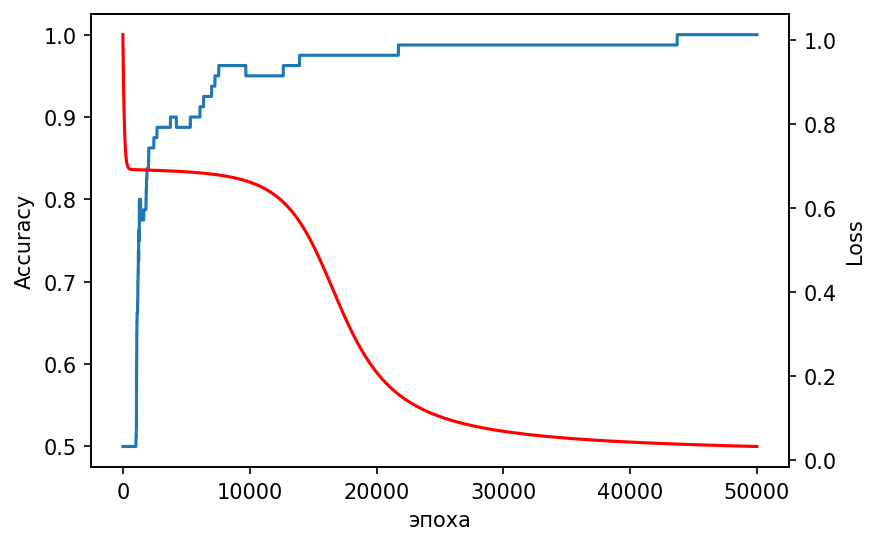

In [ ]:
fig, ax = plt.subplots(dpi=150)
ax.plot(accuracy)
ax.set_xlabel('эпоха')
ax.set_ylabel('Accuracy')
ax2 = ax.twinx()
ax2.plot(loss, color='red')
ax2.set_ylabel('Loss')
plt.show()

Раскрасим по предсказанным классам

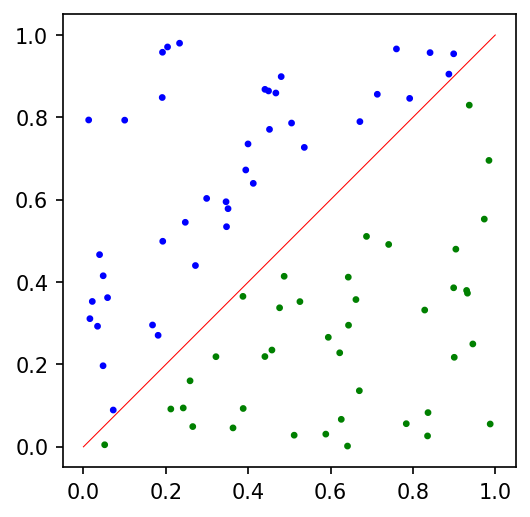

In [ ]:
fig, ax = plt.subplots(dpi=150)
ax.set_aspect('equal')
ax.scatter(x1, x2, s=5, c=np.where(prediction, 'green', 'blue').flatten())
ax.plot([0,1], [0,1], lw=0.5, color='red')
plt.show()